In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from torch.autograd import grad
DEVICE = 'cpu'
DTYPE  = torch.float32

In [2]:
from stream_evolution_potential import stream_evolution
from plot_functions import stream_3projections
from get_potential_from_data import PotentialfromData

from Dataset_Network import BasicNN, NotSoBasicNN

  0%|          | 0/300 [00:00<?, ?it/s]/Users/davidchemaly/Documents/Cambridge/PhD/Nibaueur2023/stream_evolution_potential.py:65: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1690826002332/work/aten/src/ATen/native/TensorShape.cpp:3575.)
  rp = torch.matmul(r,R.T).T
100%|██████████| 300/300 [00:00<00:00, 3943.21it/s]


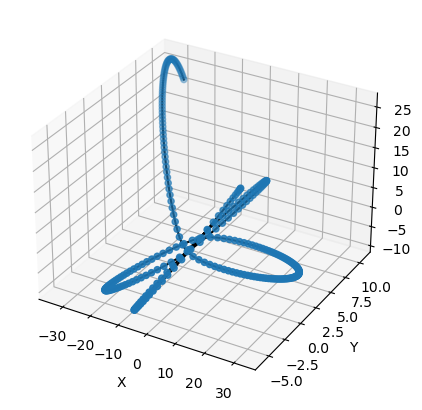

/Users/davidchemaly/miniforge3/envs/Torch/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1690826002332/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


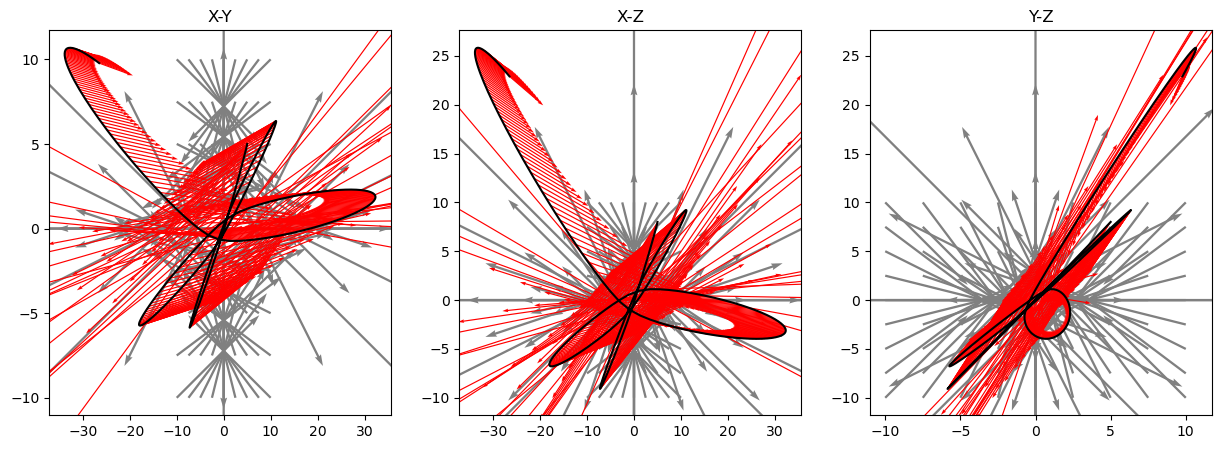

100%|██████████| 30/30 [00:00<00:00, 1883.70it/s]


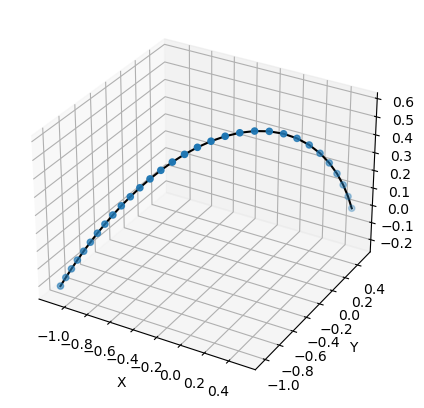

/Users/davidchemaly/miniforge3/envs/Torch/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1690826002332/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


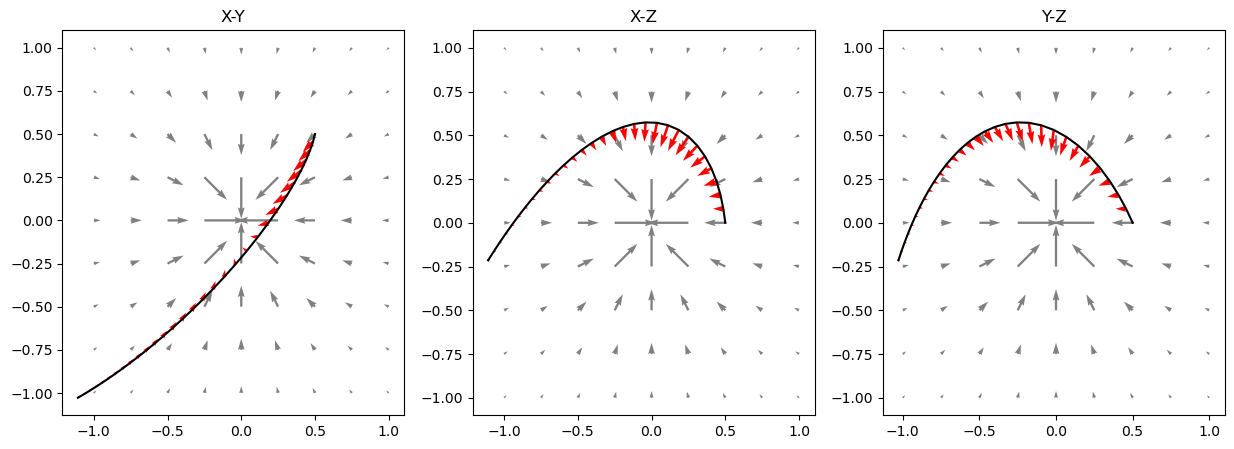

In [3]:
test = stream_evolution(0,30,1,
                        'Point Mass',
                        [0.5,0.5,0],
                        [-0.01,-0.04,0.08],
                        [0,0,0])
PM_position, PM_velocity, PM_accelera = test.run()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy())
ax.plot(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy(), color='black')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
stream_3projections(-1,1,9,5,PM_position,PM_velocity,PM_accelera,'Point Mass','PM_3proj')

100%|██████████| 15/15 [00:00<00:00, 6790.56it/s]


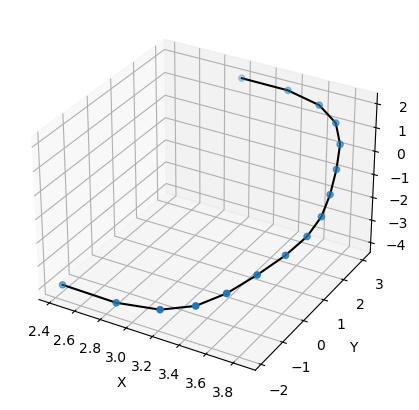

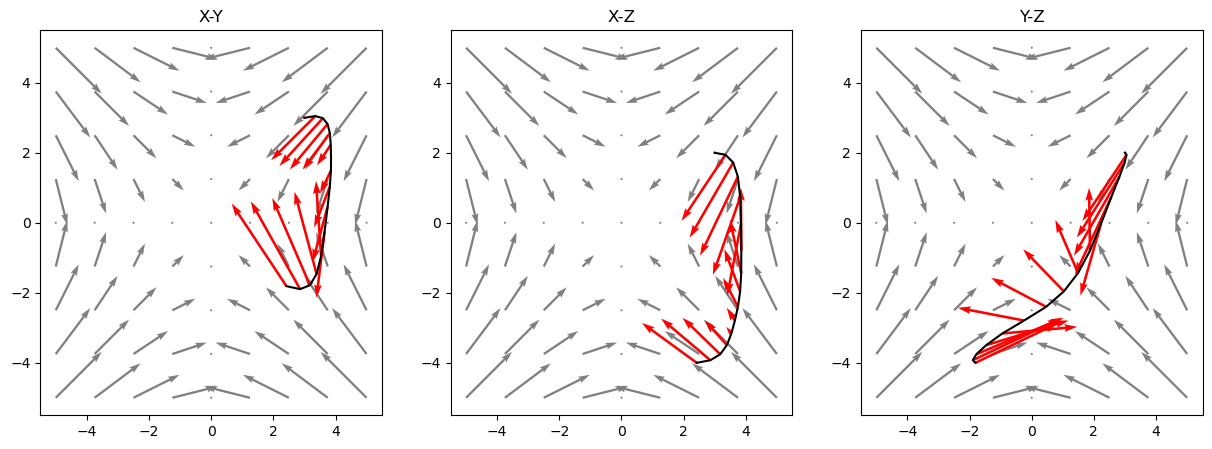

In [4]:
test = stream_evolution(0,30,2,
                        'Line',
                        [3,3,2],
                        [0.2,0.05,0.01],
                        [0,0,0])
PM_position, PM_velocity, PM_accelera = test.run()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy())
ax.plot(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy(), color='black')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

stream_3projections(-5,5,9,5,PM_position,PM_velocity,PM_accelera,'Line','Line_3proj')

100%|██████████| 75/75 [00:00<00:00, 7597.28it/s]


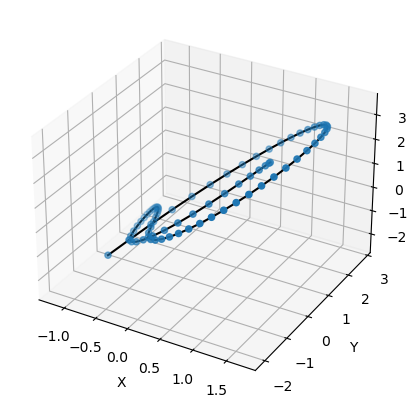

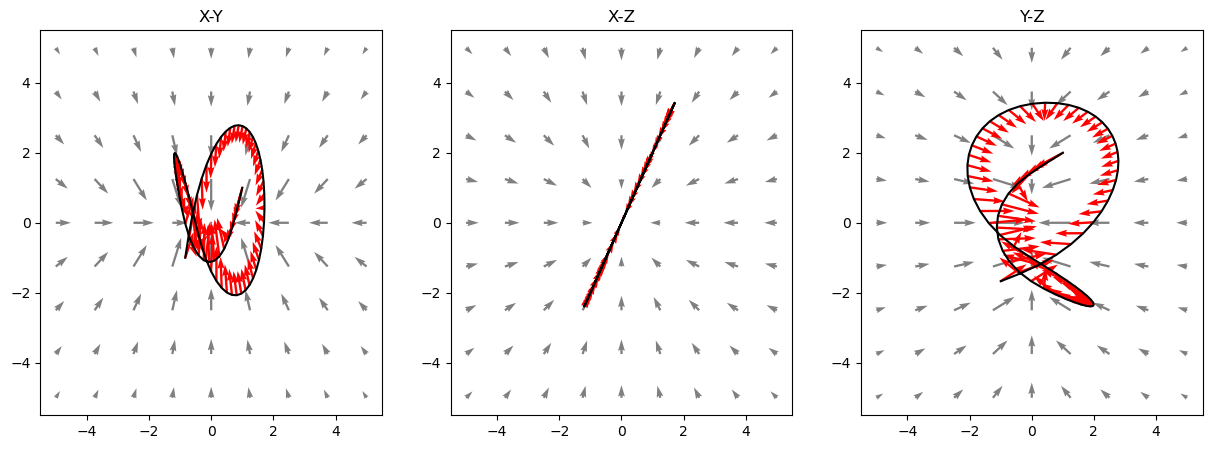

In [5]:
test = stream_evolution(0,150,2,
                        'Disk',
                        [1,1,2],
                        [0,0,0],
                        [0,0,0])
PM_position, PM_velocity, PM_accelera = test.run()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy())
ax.plot(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy(), color='black')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

stream_3projections(-5,5,9,5,PM_position,PM_velocity,PM_accelera,'Disk','Disk_3proj')

In [ ]:
test = stream_evolution(0,300,1,
                        'Halo',
                        [5,5,8],
                        [0.01,-0.01,-0.02],
                        [0,0,0])
PM_position, PM_velocity, PM_accelera = test.run()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy())
ax.plot(PM_position[:,0].numpy(), PM_position[:,1].numpy(), PM_position[:,2].numpy(), color='black')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
stream_3projections(-10,10,9,5,PM_position,PM_velocity,PM_accelera,'Halo','Halo_3proj')

In [3]:
potential_type = 'Disk'
x_path   = 'x_'+potential_type+'Potential'
y_path   = 'y_'+potential_type+'Potential'
pot_path = potential_type+'Potential_BasicNN_weights'

x, y = np.loadtxt(x_path+'.txt'), np.loadtxt(y_path+'.txt')
data_tensor = torch.cat((torch.tensor(x)[:,None], torch.tensor(y)[:,None]), dim=1)

In [4]:
model = NotSoBasicNN()
model.load_state_dict(torch.load(pot_path+'.pth'))
stream = PotentialfromData(data_tensor, model)

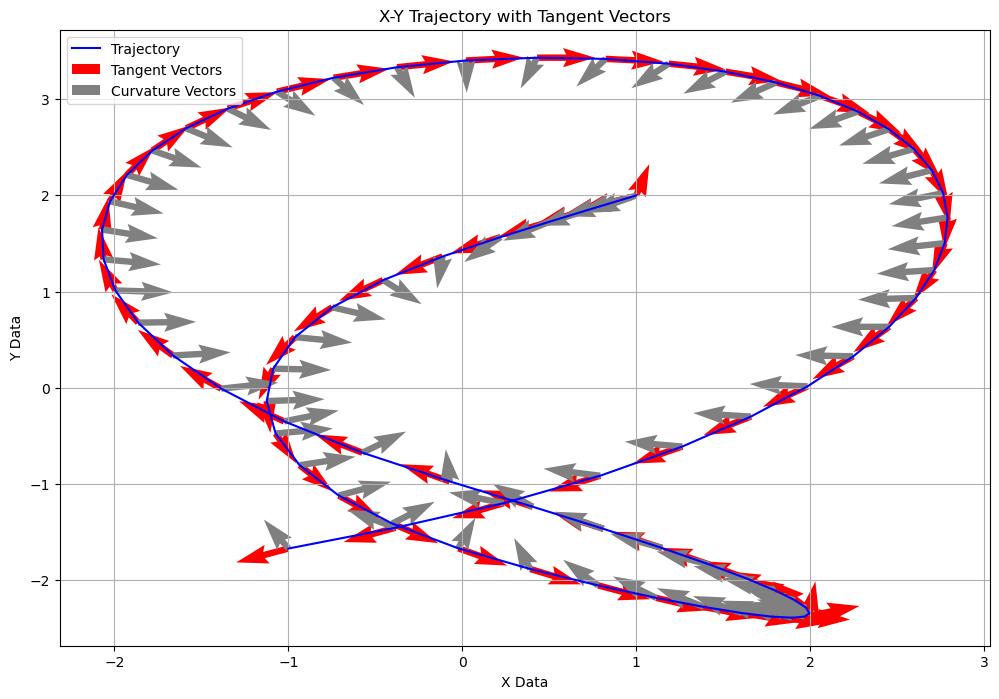

In [6]:
# Compute the tangent vectors using the tangent_vector method
x_tangent, y_tangent     = stream.tangent_vector_normalized()
x_curvature, y_curvature = stream.curvature_vector_normalized()

# Plotting the trajectory along with the tangent vectors
plt.figure(figsize=(12, 8))
plt.plot(data_tensor[:,0].numpy(), data_tensor[:,1].numpy(), label='Trajectory', color='blue')
plt.quiver(x, y,
           x_tangent.detach().numpy(), y_tangent.detach().numpy(),
           angles='xy', scale_units='xy', scale=3, color='red', label='Tangent Vectors')
plt.quiver(x, y,
           x_curvature.detach().numpy(), y_curvature.detach().numpy(),
           angles='xy', scale_units='xy', scale=3, color='grey', label='Curvature Vectors')
plt.title('X-Y Trajectory with Tangent Vectors')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.grid(True)
plt.show()


Text(0, 0.5, 'T $\\cdot$ $\\kappa$')

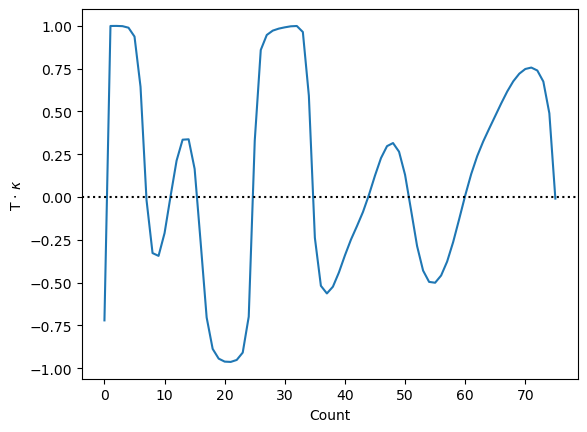

In [20]:
dot_products = (x_tangent*x_curvature + y_tangent*y_curvature).sum(dim=1)
plt.plot(dot_products.detach().cpu())
plt.axhline(0,color='k',linestyle=':')
plt.xlabel('Count')
plt.ylabel(r'T $\cdot$ $\kappa$')